### set up

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt



ModuleNotFoundError: No module named 'torch'

In [2]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [3]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [4]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### import data

In [5]:
import pandas as pd
data = pd.read_csv('report_2018-2019.csv')
display(data)

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
...,...,...,...,...,...,...,...,...,...,...
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089


### visualize data

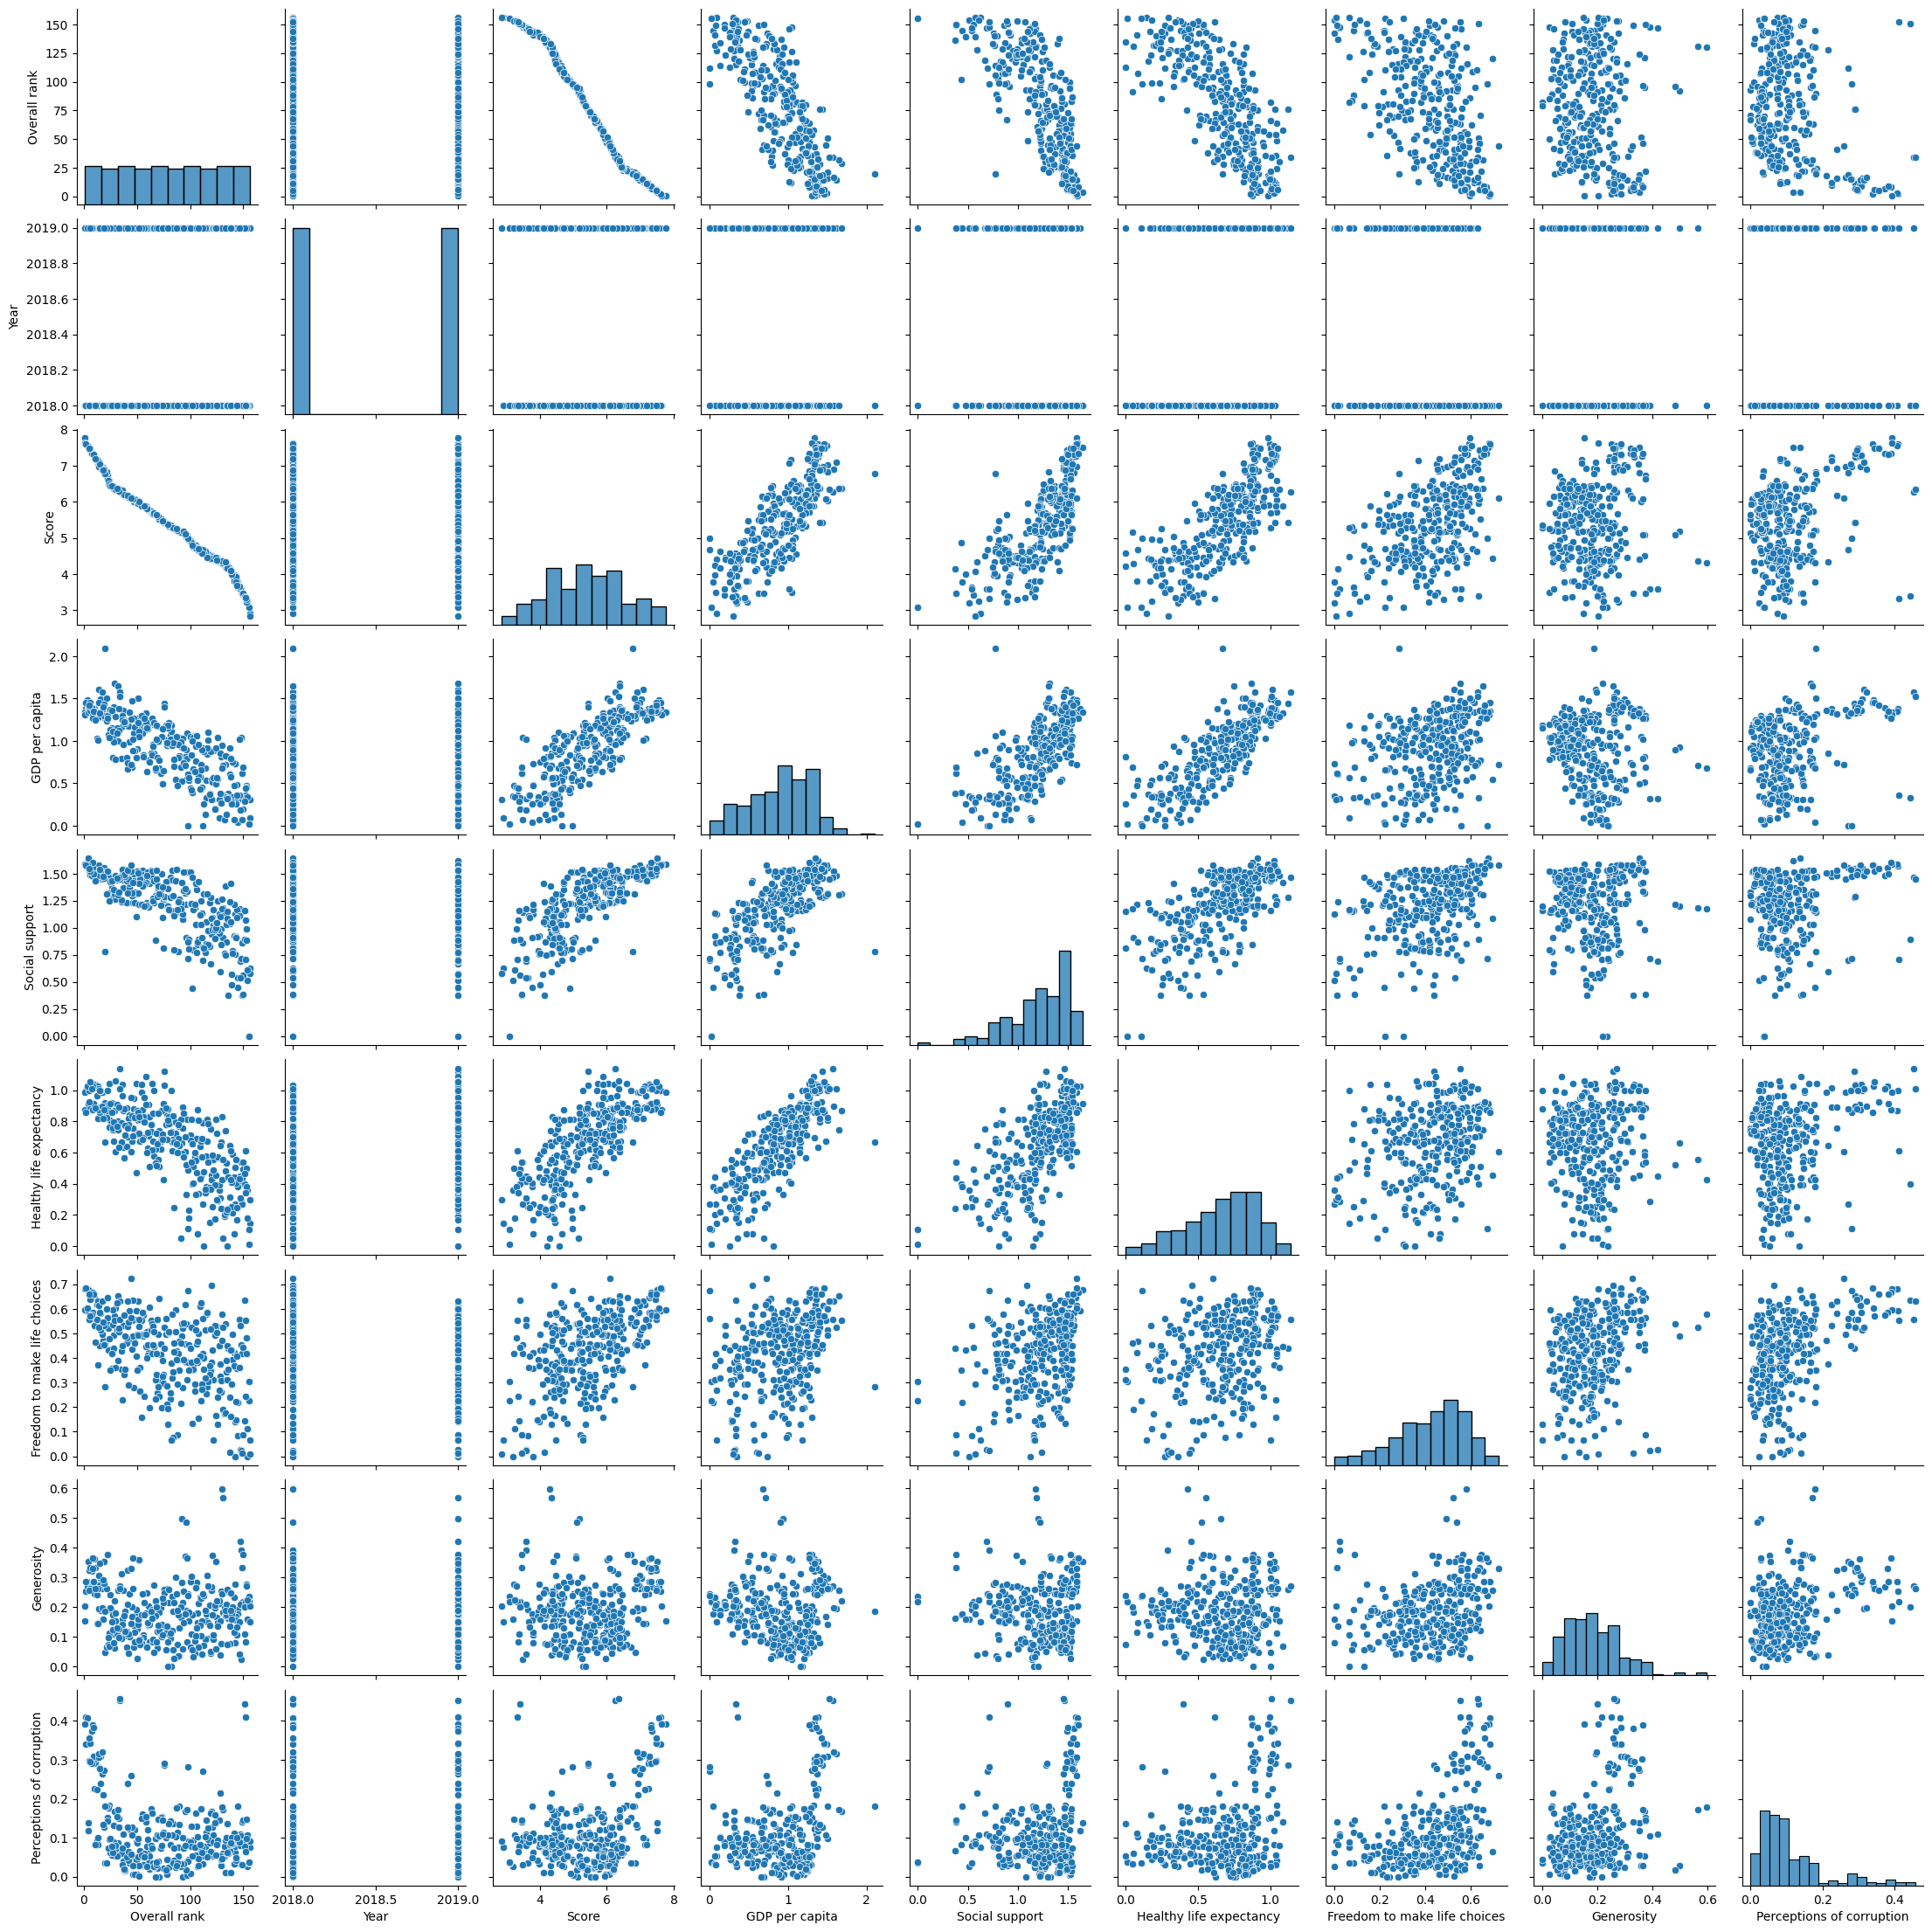

In [6]:
import seaborn as sns

sns.pairplot(data)

### create training sets

In [7]:
#create trainign sets

x = data["Score"]
y = data["Overall rank"]
x_train = data["Score"][:248]
y_train = data["Overall rank"][:248]

x_teste = data[248:]
y_teste = data[248:]

size = len(data["Score"])

x_train, y_train

(0      3.203
 1      3.632
 2      4.719
 3      4.586
 4      5.211
        ...  
 243    4.571
 244    6.262
 245    6.343
 246    6.198
 247    6.173
 Name: Score, Length: 248, dtype: float64,
 0      154
 1      145
 2      107
 3      112
 4       88
       ... 
 243    113
 244     34
 245     34
 246     38
 247     39
 Name: Overall rank, Length: 248, dtype: int64)

### plotting data

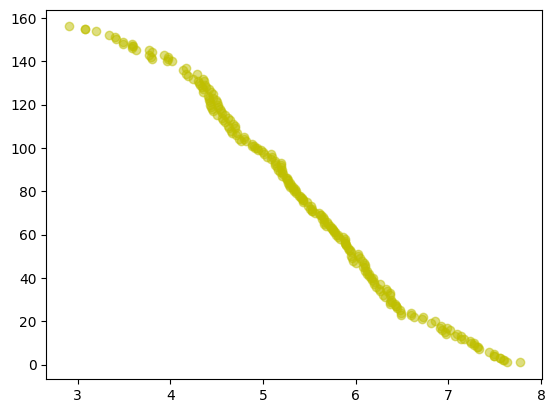

In [8]:
plt.scatter(x_train, y_train, color = 'y', alpha=0.5)

### create linear regression class

In [9]:
#create linear regression class
class LinearReg(nn.Module):
  def __init__(self):
      super().__init__()
      self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
      self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float))

      def forward(self, x: torch.Tensor) -> torch.Tensor:
         return self.weight * X + self.bias
